## Email Spam detection using NLP

In [2]:
import pandas as pd
import re
import seaborn as sns

In [3]:
df = pd.read_csv("Dataset/spam.csv",encoding="ISO-8859-1")


In [4]:
df.drop(columns="Unnamed: 2",inplace=True, axis=1)
df.drop(columns="Unnamed: 3",inplace=True, axis=1)
df.drop(columns="Unnamed: 4",inplace=True, axis=1)

In [5]:
print(df.head())
print(df.describe())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
          v1                      v2
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [6]:
# re_pattren = r'\b[A-Za-z0-9]+\b'

# def RE(s:str) -> str:
#     a = re.findall(re_pattren,s)
#     ans = ' '.join(a)
#     return ans

In [7]:
# l = []
# for i in range(df["MESSAGE"].count()):
#     l.append(RE(df["MESSAGE"][i]))

In [8]:
# df["Lvl1"] = l

In [9]:
# Perform Lemmation
import nltk
# nltk.download("wordnet") --- lemmatization -- downloaded
# nltk.download("punkt") --- tokenizor downloaded
# nltk.download("stopword") -- downloaded
# nltk.download('omw-1.4') - --lemmatization - -downloaded

In [10]:
def Calculate_Length(df):
    leng = []
    for i in range(df["v2"].count()):
        leng.append(len(df["v2"][i]))
    # print(leng)
    df["Length"] = leng
Calculate_Length(df)

d:\Shubham_File_\MachineLearning_MyProjects\MODELS\VENV\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length'>

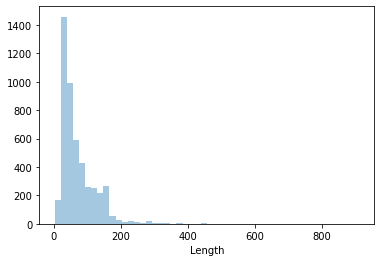

In [11]:
sns.distplot(a=df[df['v1'] == "ham"].Length, kde=False)


<AxesSubplot:xlabel='Length'>

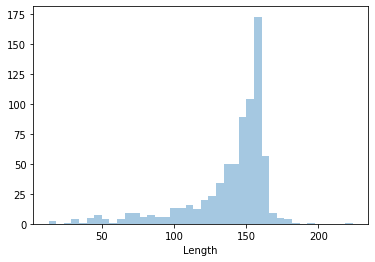

In [12]:
sns.distplot(a=df[df['v1'] == "spam"].Length, kde=False)


In [13]:
from nltk import word_tokenize
def Tokenize(df):
    tokens = []
    for i in range(df["v2"].count()):
        tokens.append(word_tokenize(df["v2"][i]))
    df["tokens"] = tokens
Tokenize(df)
print("Original Text -> ", df["v2"][4])
print("Tokenized Text -> ", df["tokens"][4])

Original Text ->  Nah I don't think he goes to usf, he lives around here though
Tokenized Text ->  ['Nah', 'I', 'do', "n't", 'think', 'he', 'goes', 'to', 'usf', ',', 'he', 'lives', 'around', 'here', 'though']


In [14]:
from nltk.corpus import stopwords
def RemoveStopword(df):
    stop_words = set(stopwords.words("english"))
    fil = []
    filters = []
    for i in range(df["tokens"].count()):
        fil = []
        for word in df["tokens"][i]:
            if word.casefold() not in stop_words:
                fil.append(word)
        filters.append(fil)
    df["Filtered-Stopwords"] = filters

RemoveStopword(df)

print("Tokenized Text -> ", df["tokens"][4])
print("After removing Stopwords -> ", df["Filtered-Stopwords"][4])


Tokenized Text ->  ['Nah', 'I', 'do', "n't", 'think', 'he', 'goes', 'to', 'usf', ',', 'he', 'lives', 'around', 'here', 'though']
After removing Stopwords ->  ['Nah', "n't", 'think', 'goes', 'usf', ',', 'lives', 'around', 'though']


In [15]:
lem = nltk.WordNetLemmatizer()
def Lemmantize_Text(df):
    lemmantized = []
    l = []
    for i in range(df["Filtered-Stopwords"].count()):
        l = []
        for word in df["Filtered-Stopwords"][i]:
            l.append(lem.lemmatize(word))
        lemmantized.append(l)

    df["Lemmanted"] = lemmantized

Lemmantize_Text(df)
print("After removing Stopwords -> ", df["Filtered-Stopwords"][4])
print("Lemmatization -> ", df["Lemmanted"][4])

After removing Stopwords ->  ['Nah', "n't", 'think', 'goes', 'usf', ',', 'lives', 'around', 'though']
Lemmatization ->  ['Nah', "n't", 'think', 'go', 'usf', ',', 'life', 'around', 'though']


In [16]:
def FinalizeText(df):
    text = []
    for i in range(df["Lemmanted"].count()):
        t = ' '.join(df["Lemmanted"][i])
        text.append(t)
    df["Final Text"] = text
    # df.head()

FinalizeText(df)
print("Original text -> ",df["v2"][4])
print("Processed text -> ",df["Final Text"][4])


Original text ->  Nah I don't think he goes to usf, he lives around here though
Processed text ->  Nah n't think go usf , life around though


In [17]:
for i in range(df["v1"].count()):
    if df["v1"][i] == "ham":
        df["v1"][i] = int(0)
    else:
        df["v1"][i] = int(1)

df.head()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_19300\3050830309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["v1"][i] = int(0)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_19300\3050830309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["v1"][i] = int(1)


,v1,v2,Length,tokens,Filtered-Stopwords,Lemmanted,Final Text
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, jurong, point, ,, crazy, .., Available, b...","[Go, jurong, point, ,, crazy, .., Available, b...","Go jurong point , crazy .. Available bugis n g..."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, ..., Joking, wif, u, oni, ...]",Ok lar ... Joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, early, hor, ..., U, c, already, ...","[U, dun, say, early, hor, ..., U, c, already, ...",U dun say early hor ... U c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, n't, think, goes, usf, ,, lives, around,...","[Nah, n't, think, go, usf, ,, life, around, th...","Nah n't think go usf , life around though"


In [18]:
def RemoveUnwantedColumn(df):
    # print(df.head())
    df.drop(['tokens', 'Filtered-Stopwords','Lemmanted'], axis=1, inplace=True)
RemoveUnwantedColumn(df)

In [19]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(df["v1"])
df.drop(columns="v1", axis=1, inplace=True)
x = df
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=0)


In [20]:
x_val.head()

,v2,Length,Final Text
4456,Aight should I just plan to come up later toni...,50,Aight plan come later tonight ?
690,Was the farm open?,18,farm open ?
944,I sent my scores to sophas and i had to do sec...,221,sent score sophas secondary application school...
3768,Was gr8 to see that message. So when r u leavi...,96,gr8 see message . r u leaving ? Congrats dear ...
1189,In that case I guess I'll see you at campus lodge,49,case guess 'll see campus lodge


In [21]:
# Count vertorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

cv = CountVectorizer(max_features=5000)
temp_train = cv.fit_transform(x_train['Final Text']).toarray()
temp_val = cv.transform(x_val['Final Text']).toarray()


In [22]:
# countVect= CountVectorizer()
# text = ["The dark flames of elixer becomes more dark - a monotonous"]
# cv = countVect.fit_transform(text).toarray()
# print(cv[0])
# print("Totol words are 12")
# print("Length of array is ", len(cv[0]))

In [23]:
# tf = TfidfTransformer()
# transform = tf.fit_transform(cv)
# print("TF-IDF : ",transform.todense())
# print("Count Vector :",cv[0])

In [24]:
# TF-IDF
tf = TfidfTransformer()
temp_train = tf.fit_transform(temp_train)
temp_val = tf.transform(temp_val)


In [25]:
#merging temp datafram with original dataframe
temp_train = pd.DataFrame(temp_train.toarray(), index=x_train.index)
temp_val = pd.DataFrame(temp_val.toarray(), index=x_val.index)
x_train = pd.concat([x_train, temp_train], axis=1, sort=False)
x_val = pd.concat([x_val, temp_val], axis=1, sort=False)

x_train.head()

,v2,Length,Final Text,0,1,2,3,4,5,6,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
1114,No no:)this is kallis home ground.amla home to...,60,: ) kallis home ground.amla home town durban : ),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3589,I am in escape theatre now. . Going to watch K...,69,escape theatre now. . Going watch KAVALAN minute,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3095,We walked from my moms. Right on stagwood pass...,110,walked mom . Right stagwood pas right winterst...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1012,I dunno they close oredi not... ÌÏ v ma fan...,46,dunno close oredi ... ÌÏ v fan ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.383063,0.0,0.0,0.0,0.0,0.0,0.0
3320,Yo im right by yo work,22,Yo im right yo work,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#dropping the final_text column
x_train.drop(['Final Text'], axis=1, inplace=True)
x_val.drop(['Final Text'], axis=1, inplace=True)

x_train.head()

,v2,Length,0,1,2,3,4,5,6,7,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
1114,No no:)this is kallis home ground.amla home to...,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3589,I am in escape theatre now. . Going to watch K...,69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3095,We walked from my moms. Right on stagwood pass...,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1012,I dunno they close oredi not... ÌÏ v ma fan...,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.383063,0.0,0.0,0.0,0.0,0.0,0.0
3320,Yo im right by yo work,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#dropping the v2 column
x_train.drop(['v2'], axis=1, inplace=True)
x_val.drop(['v2'], axis=1, inplace=True)

In [28]:
x_train.head()

,Length,0,1,2,3,4,5,6,7,8,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
1114,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3589,69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3095,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1012,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.383063,0.0,0.0,0.0,0.0,0.0,0.0
3320,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#converting the labels to int datatype (for model training)
y_train = y_train.astype(int)
y_val = y_val.astype(int)


In [30]:
def Vectorize_And_TFIDFTranform(df):
    cv = CountVectorizer(max_features=5000)
    temp_train = cv.fit_transform(df['Final Text']).toarray()
    # print("temp_train ", temp_train)
    tf = TfidfTransformer()
    temp_train = tf.fit_transform(temp_train)
    # print("temp_train ", temp_train)

    temp_train = pd.DataFrame(temp_train.toarray())
    # print("temp_train ", temp_train)

    df = pd.concat([df, temp_train], axis=1, sort=False)
    # print(df)
    df.drop(['Final Text'], axis=1, inplace=True)
    df.drop(['v2'], axis=1, inplace=True)
    # print(df)
    return df

In [31]:
def PreProcess_Data(dataf):
    Calculate_Length(dataf)
    Tokenize(dataf)
    RemoveStopword(dataf)
    Lemmantize_Text(dataf)
    FinalizeText(dataf)
    RemoveUnwantedColumn(dataf)
    return Vectorize_And_TFIDFTranform(dataf)
    

In [32]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# n_estimator - number of trees (decesion tree) in forest
model = RandomForestClassifier(n_estimators=100)
print(type(y_train))
model.fit(x_train, y_train)
y_preds = model.predict(x_val.values)
print("Random Forest:", accuracy_score(y_val, y_preds))


<class 'pandas.core.frame.DataFrame'>


d:\Shubham_File_\MachineLearning_MyProjects\MODELS\VENV\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Shubham\AppData\Local\Temp\ipykernel_19300\2751992830.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Random Forest: 0.9757847533632287


In [44]:
# text = ["You have won the prize of 10000000 dollars"]
text_df = pd.DataFrame(columns=["v2"])
text = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18'"]

text_df["v2"] = text
print(text_df)
text = PreProcess_Data(text_df)
print("TEXT _> ")
print(text)

                                                  v2
0  Free entry in 2 a wkly comp to win FA Cup fina...
TEXT _> 
   Length        0        1        2        3        4        5        6  \
0     154  0.19245  0.19245  0.19245  0.19245  0.19245  0.19245  0.19245   

        7       8  ...       11       12       13       14       15       16  \
0  0.3849  0.3849  ...  0.19245  0.19245  0.19245  0.19245  0.19245  0.19245   

        17       18       19       20  
0  0.19245  0.19245  0.19245  0.19245  

[1 rows x 22 columns]


In [45]:
def FitData(dataf,size):
    for i in range(dataf.shape[1],size+1):
        dataf[f"{i}"] = 0.0
FitData(text,5000)
text.head()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_19300\1133611315.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataf[f"{i}"] = 0.0
C:\Users\Shubham\AppData\Local\Temp\ipykernel_19300\1133611315.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataf[f"{i}"] = 0.0
C:\Users\Shubham\AppData\Local\Temp\ipykernel_19300\1133611315.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

,Length,0,1,2,3,4,5,6,7,8,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,154,0.19245,0.19245,0.19245,0.19245,0.19245,0.19245,0.19245,0.3849,0.3849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
ans = model.predict(text)
if ans:
    print("Spam")
else:
    print("Ham")

Spam


d:\Shubham_File_\MachineLearning_MyProjects\MODELS\VENV\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
